In [13]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns

In [14]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras

df = pd.read_csv("abalone.csv", index_col=0)
df

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight,Rings
id,,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9


In [15]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole_weight', 'Shucked_weight',
       'Viscera_weight', 'Shell_weight', 'Rings'],
      dtype='object')

Text(0.5, 1.0, 'Label')

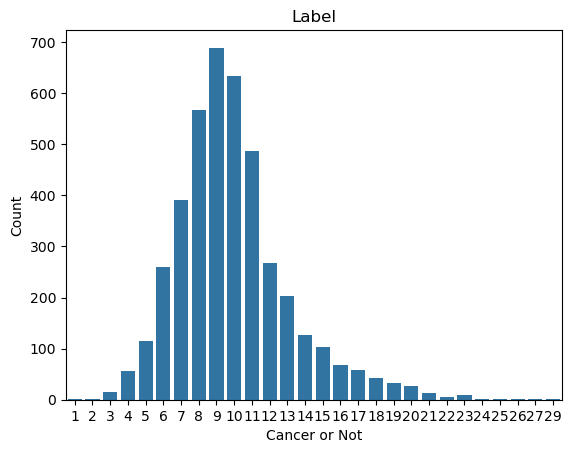

In [16]:
sns.countplot(data = df, x="Rings")
plt.xlabel("Cancer or Not")
plt.ylabel("Count")
plt.title("Label")

In [17]:
df['Rings'].value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [18]:
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

In [19]:
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole_weight      0
Shucked_weight    0
Viscera_weight    0
Shell_weight      0
Rings             0
dtype: int64

C:\Users\calix\AppData\Local\Temp\ipykernel_13412\1191235279.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
C:\Users\calix\AppData\Local\Temp\ipykernel_13412\1191235279.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Shu

<Axes: xlabel='Shucked_weight', ylabel='Density'>

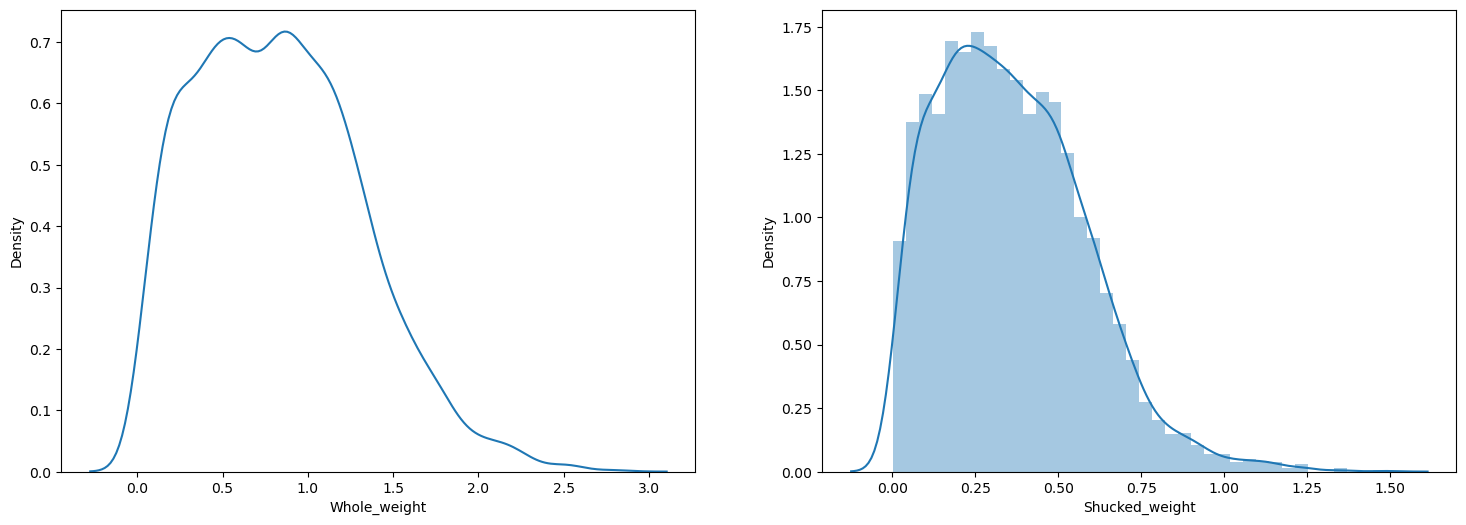

In [20]:
figure = plt.figure(figsize=(18,6))
ax1 = plt.subplot(1,2,1)
sns.distplot(df['Whole_weight'], kde = True, hist = False, ax=ax1)
ax2 = plt.subplot(1,2,2)
sns.distplot(df['Shucked_weight'], ax=ax2)

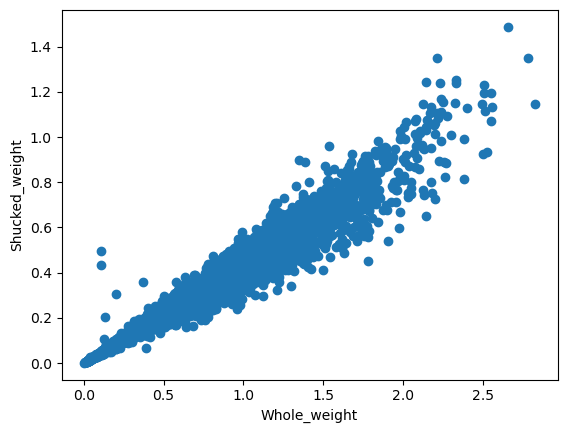

In [21]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(df['Whole_weight'], df['Shucked_weight'])
plt.xlabel('Whole_weight')
plt.ylabel('Shucked_weight')

plt.show()

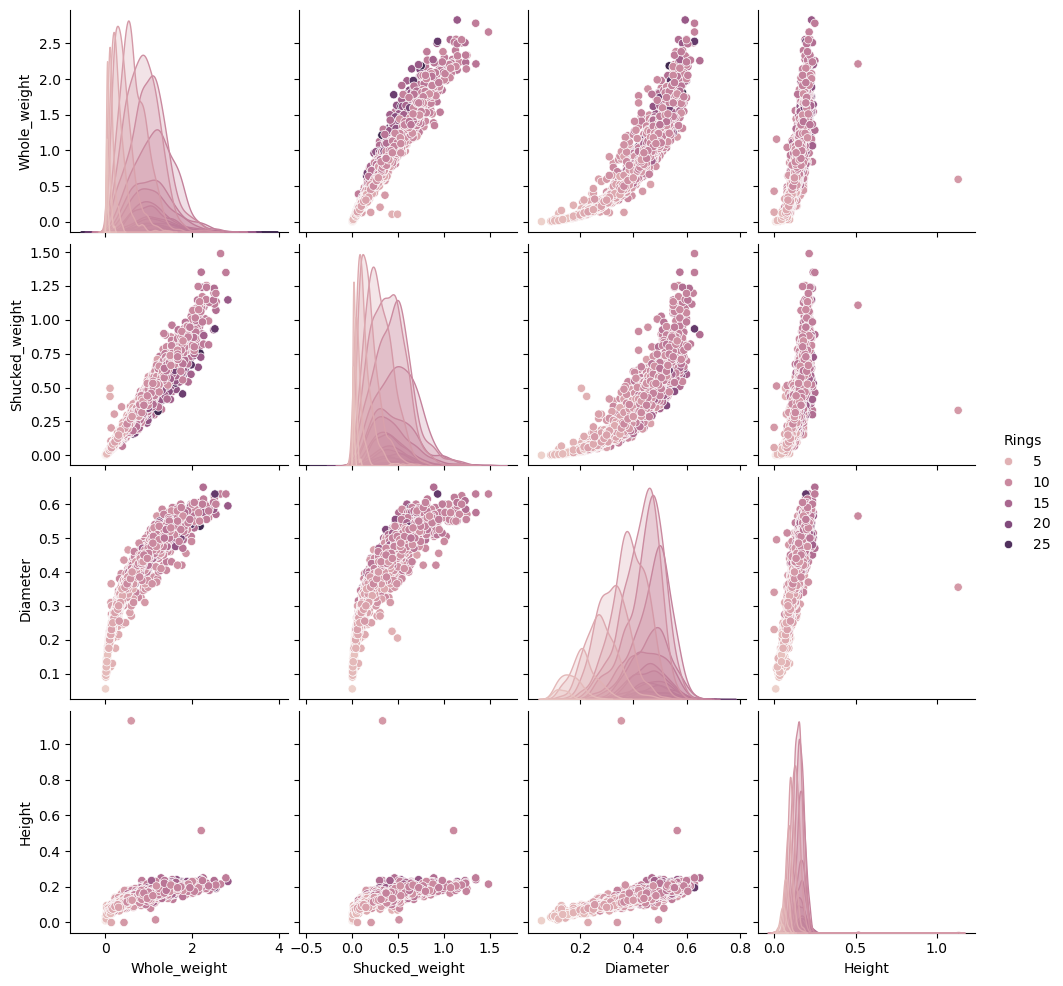

In [22]:
sns.pairplot(df,
             vars=['Whole_weight', 'Shucked_weight', 'Diameter', 'Height'],
            hue ='Rings')
plt.show()

C:\Users\calix\AppData\Local\Temp\ipykernel_13412\239028909.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Shucked_weight", data=df, palette="Set3")


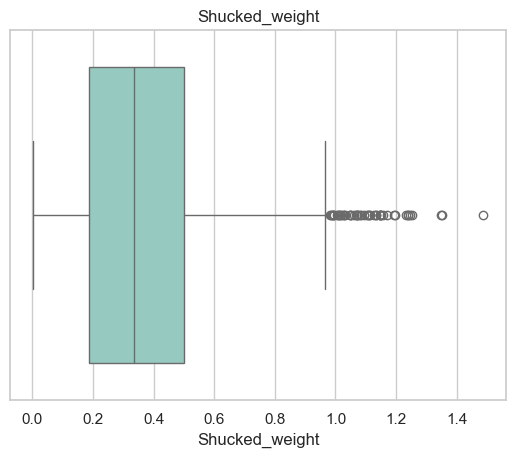

In [23]:
sns.set_theme(style="whitegrid")
sns.boxplot(x="Shucked_weight", data=df, palette="Set3")
plt.title("Shucked_weight")
plt.show()

C:\Users\calix\AppData\Local\Temp\ipykernel_13412\111277950.py:3: UserWarning: To output multiple subplots, the figure containing the passed axes is being cleared.
  df.hist(ax = ax)


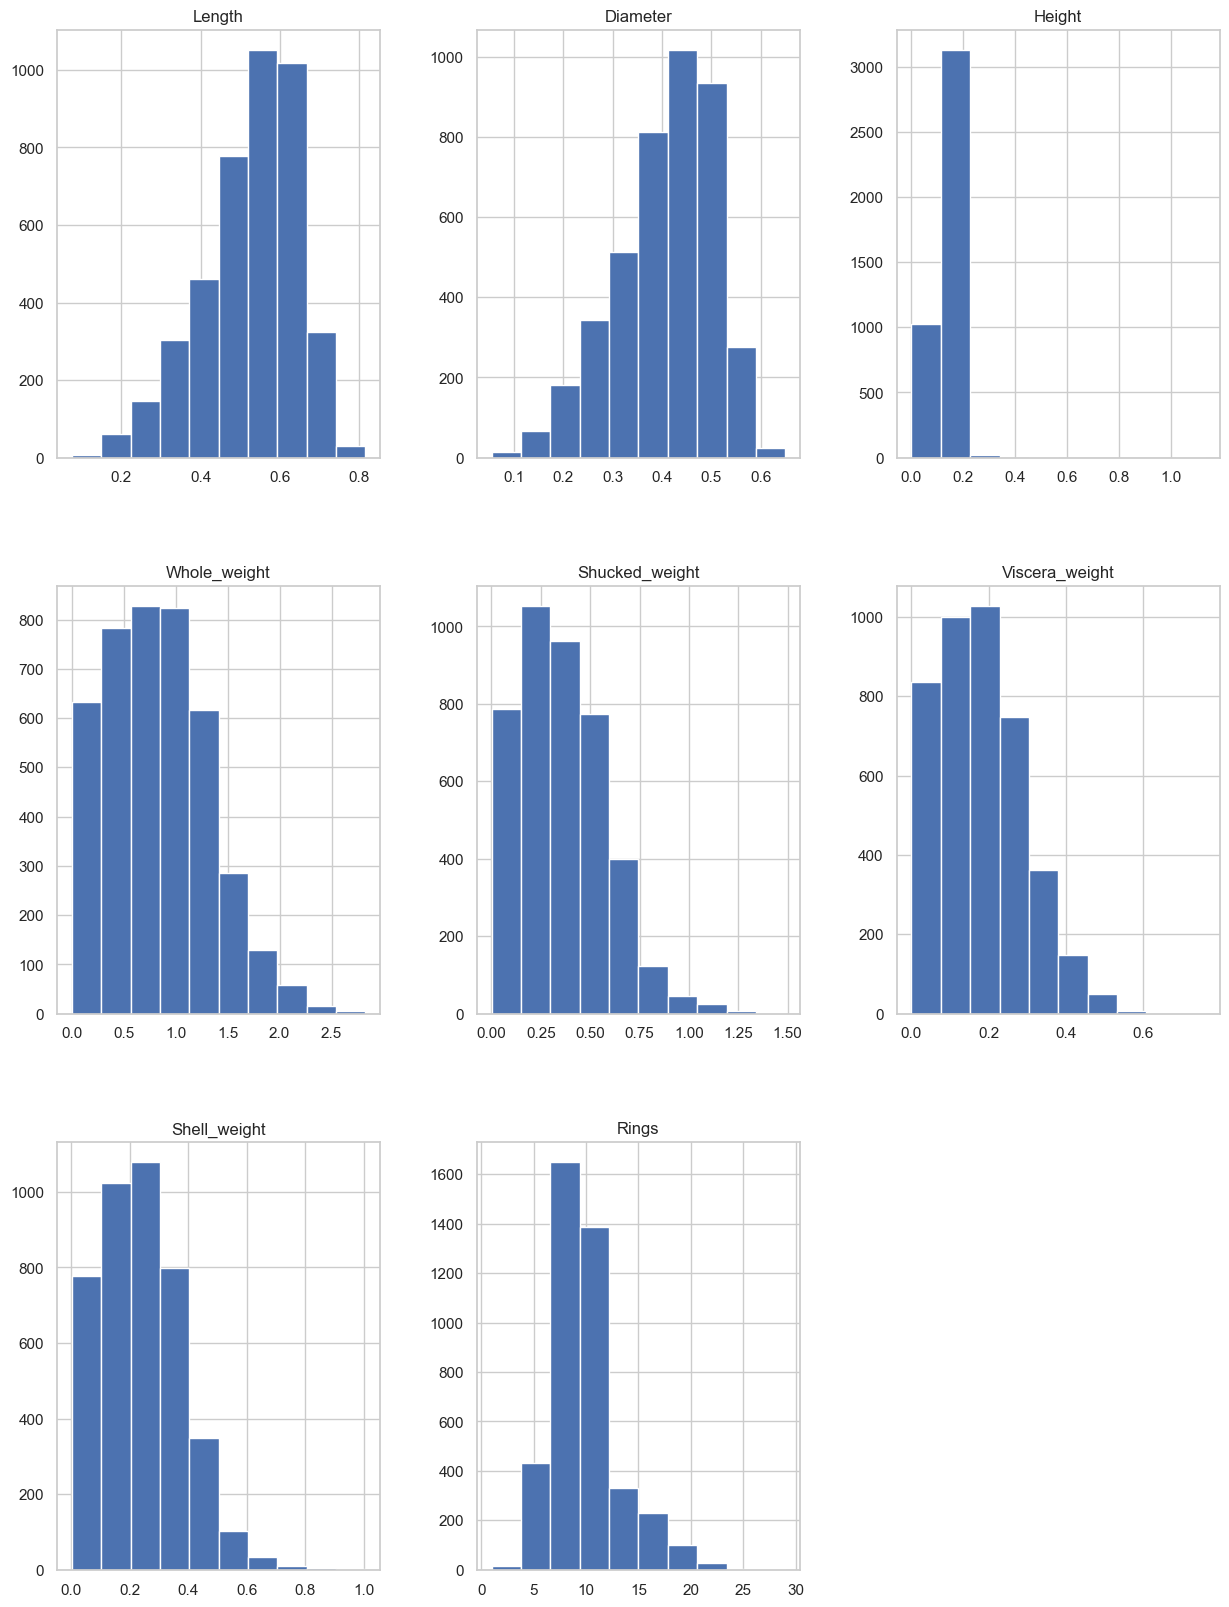

In [24]:
fig = plt.figure(figsize = (15,20))
ax = fig.gca()
df.hist(ax = ax)
plt.show()

In [25]:
X=df.drop('Rings',axis=1)
X.head()

,Sex,Length,Diameter,Height,Whole_weight,Shucked_weight,Viscera_weight,Shell_weight
id,,,,,,,,
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055


In [26]:
y=df['Rings']
y.value_counts().sort_index()

Rings
1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: count, dtype: int64

In [27]:
print ("==================================")
print (" ACCURACY OF OTHER ML CLASSIFIERS" )
print ("==================================")

 ACCURACY OF OTHER ML CLASSIFIERS


In [28]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
X_encoded = encoder.fit_transform(X)

In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_encoded, y,test_size=0.25,random_state=0)

In [30]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [31]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

In [51]:
print("\n--- SVM Classifier ---")
print(accuracy_score(y_test, pred_svm))
print(confusion_matrix(y_test, pred_svm))


--- SVM Classifier ---
0.23157894736842105
[[ 0  0  0  0  0  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  3  8  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  4 15 10  3  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1 18 29  9  3  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 13 36 28 30  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 17 49 45 24  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 36 66 41  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  3 20 50 54 12  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 17 31 54 14  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  8 34 39 11  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  9 28  8  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 13 14  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  8 10  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2 

In [54]:
clf_lr = LogisticRegression(random_state=0)
clf_lr.fit(X_train, y_train)

pred_lr = clf_lr.predict(X_test)

print ("\n--- Logistic Regression Classifier ---")
print (accuracy_score(y_test, pred_lr))
print (confusion_matrix(y_test, pred_lr))


--- Logistic Regression Classifier ---
0.23444976076555024
[[ 0  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8  2  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  4 15 13  5  2  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  9 25 18  6  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 19 39 29 18  4  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  6 26 37 40 18  6  3  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3 11 32 54 36 12  1  3  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 22 41 40 22  4  3  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  6 15 27 36 26  8  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  5 26 36 20  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  2  6  5 16 12  4  5  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  6 12  5  4  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  1  4  8  5  2  2  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0

In [56]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print (accuracy_score(y_test, pred_nn))
print (confusion_matrix(y_test, pred_nn))


--- Neural Network Classifier ---
0.21818181818181817
[[ 0  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  3  6  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  5 14 13  2  3  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  5 25 11 12  7  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  3 21 27 29 27  3  2  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  2  7 19 38 27 24 11  3  4  2  0  1  0  0  1  0  0  0  0  0  0]
 [ 0  0  0  3 11 30 43 35 16  5  6  3  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  2  4 25 34 30 26  8  5  3  1  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  7 10 27 26 34  9  1  3  3  0  1  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  4 10 23 25 15  6  2  4  3  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  2  7  6 13 11  4  6  0  0  1  0  0  0  1  0  0  0  0  0]
 [ 0  0  0  0  1  6  9  4  5  1  4  2  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  4  6  5  4  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  

In [57]:
clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print (accuracy_score(y_test, pred_dt))
print (confusion_matrix(y_test, pred_dt))


--- Decision Tree Classifier ---
0.215311004784689
[[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 1  1  2  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  4  5  3  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  7  5 13  6  2  5  2  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  1  5 22 18  7  5  4  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  5 18 28 22 20 11  4  3  0  1  1  0  0  0  0  0  0  1  0  0  0
   0]
 [ 0  0  0  0 15 18 37 34 21  5  5  2  1  0  0  1  0  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  3 10 25 44 31 16  6 10  3  1  0  1  0  0  0  0  0  2  0  0
   0]
 [ 0  0  0  0  3  9 13 36 41 21  1  4  3  4  0  3  1  0  0  0  0  0  0  0
   0]
 [ 0  0  0  0  2  5  8 26 29 31  5  6  5  1  0  1  0  0  2  0  0  0  0  0
   0]
 [ 0  0  0  0  0  2  9 19 26  8  6  9  6  1  3  2  0  0  0  0  0  1  0  1
   0]
 [ 0  0  0  0  0  1  4  5 13 14  4  3  2  2  0  2  1  0  0  0  0  0 

In [60]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

print ("\n--- Radom Forest ---")
rf_clf = RandomForestClassifier(random_state=0)
rf_clf.fit(X_train, y_train)
pred = rf_clf.predict(X_test)
print(accuracy_score(y_test,pred))
print (confusion_matrix(y_test, pred))


--- Radom Forest ---
0.22488038277511962
[[ 0  4  2  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  2  8  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  4 15  7  7  2  1  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  1  7 19 20 10  2  4  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  5 11 32 36 15 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  4 21 43 37 31  1  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  4 38 48 53  5  2  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  3  3 12 41 62 16  1  0  1  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  1  5 12 29 61 12  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1 10 27 43 11  1  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  7  5 30  6  1  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  1  2 10 14  5  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  2  5 12  3  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  3  3